<a href="https://colab.research.google.com/github/jinglescode/meditorch/blob/master/demo/unet_resnet_synthetic_images_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get packages

In [2]:
!pip install meditorch

     |████████████████████████████████| 81kB 11.9MB/s 


# Data

In [0]:
from meditorch.datasets import SyntheticImagesMasks
from torch.utils.data import DataLoader
syndata = SyntheticImagesMasks()

train_set_synthetic = SyntheticImagesMasks(size=2000)
val_set_synthetic = SyntheticImagesMasks(size=200)

batch_size = 25

dataloaders_synthetic = {
    'train': DataLoader(train_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2),
    'val': DataLoader(val_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2)
}

# Model

In [6]:
from meditorch.nn.models import UNetResNet
from torchsummary import summary

model = UNetResNet(in_channel=3, n_classes=6)

print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s] 


UNetResNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

# Train

Epoch 1/6:
	LR: 0.0001
	train-> bce: 0.098034, dice: 0.924487, loss: 0.511261
	val-> bce: 0.022484, dice: 0.805827, loss: 0.414156
	Saving best model, epoch loss 0.41415583342313766 < best loss 10000000000.0
	2m 4s
----------
Epoch 2/6:
	LR: 0.0001
	train-> bce: 0.017291, dice: 0.507963, loss: 0.262627
	val-> bce: 0.009686, dice: 0.339862, loss: 0.174774
	Saving best model, epoch loss 0.1747735794633627 < best loss 0.41415583342313766
	2m 6s
----------
Epoch 3/6:
	LR: 0.0001
	train-> bce: 0.005598, dice: 0.250807, loss: 0.128203
	val-> bce: 0.004483, dice: 0.217168, loss: 0.110825
	Saving best model, epoch loss 0.11082534864544868 < best loss 0.1747735794633627
	2m 6s
----------
Epoch 4/6:
	LR: 1e-05
	train-> bce: 0.004439, dice: 0.215242, loss: 0.109840
	val-> bce: 0.004335, dice: 0.212876, loss: 0.108606
	Saving best model, epoch loss 0.10860570147633553 < best loss 0.11082534864544868
	2m 6s
----------
Epoch 5/6:
	LR: 1e-05
	train-> bce: 0.004285, dice: 0.212775, loss: 0.108530
	val

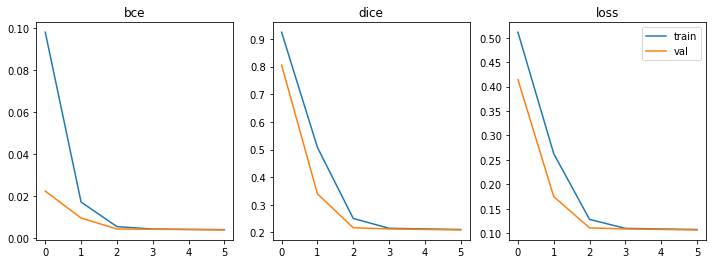

In [7]:
import torch.optim as optim
from torch.optim import lr_scheduler
from meditorch.nn import Trainer

optimizer_func = optim.Adam(model.parameters(), lr=1e-4)

lr_scheduler = lr_scheduler.StepLR(optimizer_func, step_size=3, gamma=0.1)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=lr_scheduler)

trainer.train_model(dataloaders_synthetic, num_epochs=6)

# Test

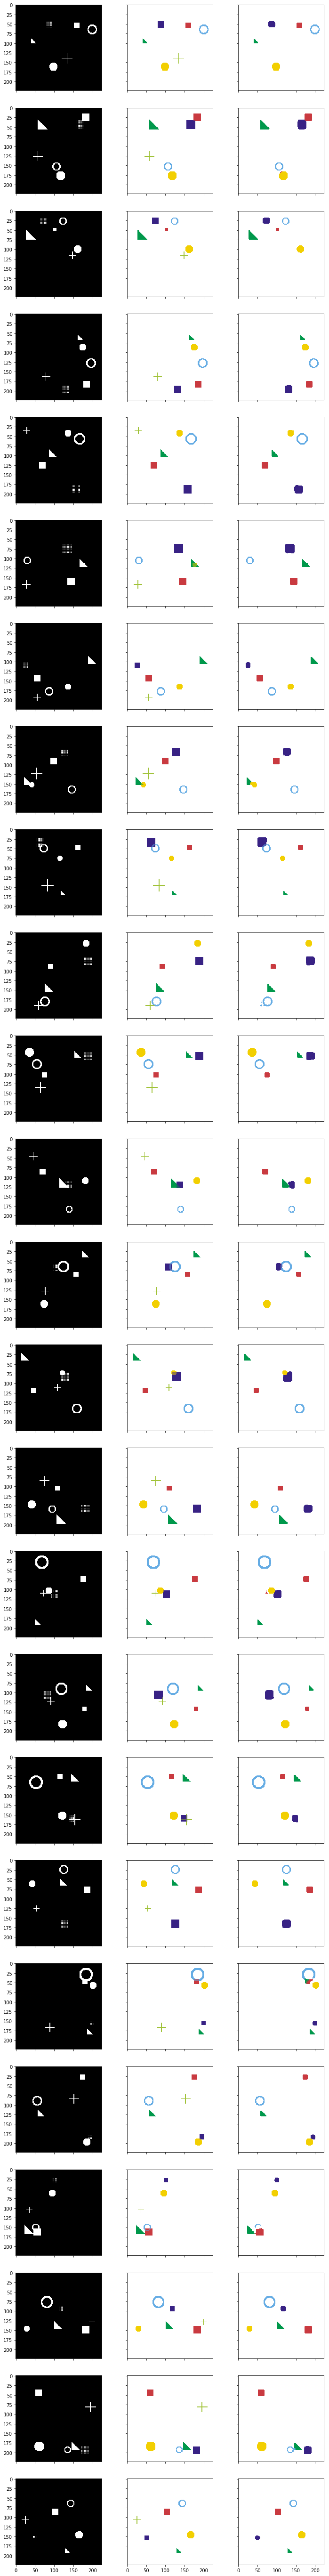

In [8]:
from meditorch.utils.plot import plot_image_truemask_predictedmask

images, masks = next(iter(dataloaders_synthetic['val']))
preds = trainer.predict(images)
plot_image_truemask_predictedmask(images, masks, preds)